**Credit Card Fraud Detection Using Machine Learning**

In [1]:
#import pandas  
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib for visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' for visualization 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 



In [2]:
# load the csv file
# store the data in 'df_train'
df_train = pd.read_csv('train.shoaib.csv')

# display first five observations using head()
df_train.head(5)


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


#annova test
#assumption
Normality: The data within each group should follow a roughly normal distribution. You can check this assumption using histograms, Q-Q plots, or statistical tests like the Shapiro-Wilk test.

Homogeneity of Variance (Homoscedasticity): The variances of the groups should be approximately equal. You can assess this assumption using statistical tests like Levene's test or by plotting the data.

Independence: Observations within each group should be independent of each other. This assumption is usually satisfied if the data is collected through random sampling or experimental design.

Random Sampling or Assignment: The data should come from a random sample or a randomized experimental design. This helps ensure that the groups are comparable and that the results can be generalized.


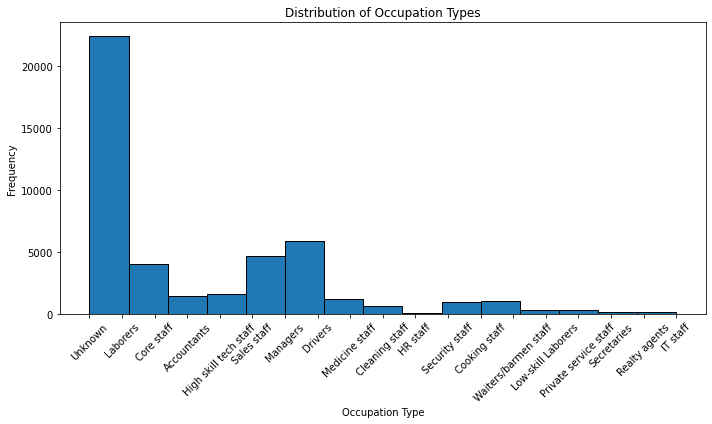

In [3]:
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# df_train = pd.read_csv('your_dataset.csv')

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram
plt.hist(df_train['occupation_type'], bins=15, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Occupation Types')
plt.xlabel('Occupation Type')
plt.ylabel('Frequency')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing

plt.show()  # Display the plot


In [4]:
from scipy.stats import shapiro

variable_to_check = 'credit_score'
_, p_value = shapiro(df_train[variable_to_check])

alpha = 0.05
if p_value > alpha:
    print("Data follows a normal distribution.")
else:
    print("Data does not follow a normal distribution.")


Data follows a normal distribution.


Dependent Variable (Credit Score): It's important for the credit scores within each occupation group to be approximately normally distributed. This assumption ensures that the test statistics used in ANOVA are valid and that the results are reliable.

Independent Variable (Occupation): The distribution of the occupation groups does not need to be normally distributed. ANOVA is robust to deviations from normality in the independent variable.

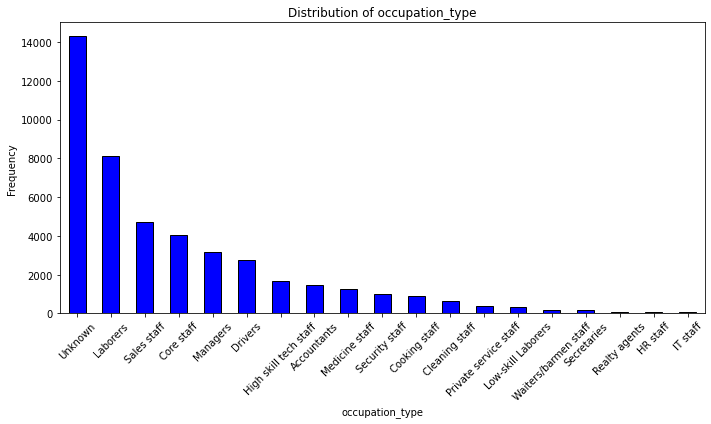

In [5]:
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# df_train = pd.read_csv('your_dataset.csv')

# Select the categorical variable you want to analyze
variable_to_check = 'occupation_type'

# Calculate the frequency of each occupation type
occupation_counts = df_train[variable_to_check].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title(f'Distribution of {variable_to_check}')
plt.xlabel(variable_to_check)
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [122]:
#.shape to check the dimension of data
df_train

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0,107934.04,612.0,others,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,F,N,N,2,96207.57,117.0,others,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,31,F,N,Y,0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,27,F,N,Y,0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,32,M,Y,N,0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [125]:
#'dtypes' to check the data type of a variable
df_train.select_dtypes(include=['object'])

,gender,owns_car,owns_house,occupation_type,prev_defaults,default_in_last_6months,credit_card_default
0,F,N,Y,others,2,1,1
1,M,N,Y,Laborers,0,0,0
2,M,N,Y,Laborers,0,0,0
3,F,N,Y,Core staff,0,0,0
4,M,Y,Y,Core staff,0,0,0
...,...,...,...,...,...,...,...
45523,F,N,N,others,0,0,0
45524,F,N,Y,Accountants,0,0,0
45525,F,N,Y,Core staff,0,0,0
45526,M,Y,N,Laborers,0,0,0


In [ ]:
#feature engineering

In [8]:
#Converting dtype from int/float to object for categorical variable
df_train['migrant_worker']=df_train['migrant_worker'].astype('object')
df_train['credit_card_default']=df_train['credit_card_default'].astype('object')

df_train['prev_defaults']=df_train['prev_defaults'].astype('object')
df_train['default_in_last_6months']=df_train['default_in_last_6months'].astype('object')

**Checking Value Counts of Categorical variables**

In [9]:
df_train['default_in_last_6months'].value_counts()
df_train['prev_defaults'].value_counts()

0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64

In [10]:
df_train['no_of_children'].value_counts()
    

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: no_of_children, dtype: int64

In [11]:
df_train['gender'].value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [12]:
df_train['owns_house'].value_counts()

Y    31642
N    13886
Name: owns_house, dtype: int64

In [13]:
df_train['owns_car'].value_counts()

N    29743
Y    15238
Name: owns_car, dtype: int64

In [126]:
df_train.dtypes.value_counts()


object     7
float64    7
int64      2
int32      1
dtype: int64

<AxesSubplot:xlabel='credit_card_default'>

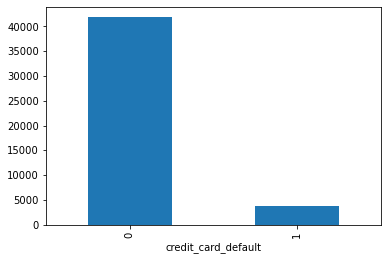

In [15]:
 df_train.pivot_table(index='credit_card_default', aggfunc='size').plot(kind='bar')
#unbalanced dataset classes

In [16]:
 df_train.pivot_table(index='credit_card_default', aggfunc='size')

credit_card_default
0    41831
1     3697
dtype: int64

**Univariate Analysis**

In [128]:
df_train.groupby('gender')['net_yearly_income'].mean()

gender
F      187088.294229
M      226752.307458
XNA    203596.950000
Name: net_yearly_income, dtype: float64

<AxesSubplot:xlabel='gender'>

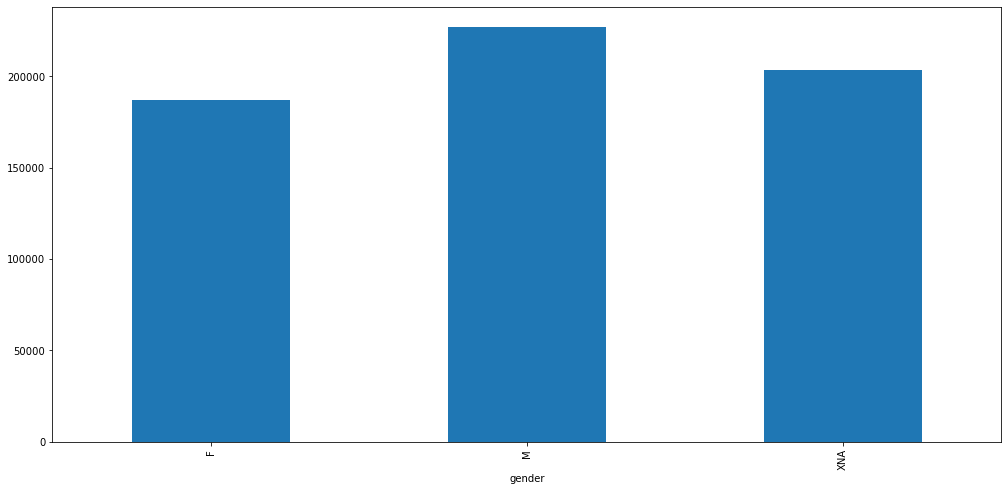

In [129]:
df_train.groupby('gender')['net_yearly_income'].mean().plot(kind='bar') #bivariate male hv higher income

inference- On average, males ('M') have a higher net yearly income compared to females ('F').
The average net yearly income for males is higher than that for females.

In [18]:
df_train['occupation_type'].value_counts()

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [19]:
df_train['occupation_type'].replace({'Unknown':'others'},inplace=True)

In [20]:
df_train['occupation_type'].value_counts()

others                   14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [21]:
df_train['no_of_days_employed'].value_counts()

365246.0    684
365244.0    669
365240.0    641
365245.0    631
365241.0    628
           ... 
8624.0        1
9500.0        1
9938.0        1
7525.0        1
5372.0        1
Name: no_of_days_employed, Length: 7874, dtype: int64

In [22]:
df_train['migrant_worker'].value_counts()

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

In [23]:
df_train=df_train.drop(columns=['name','customer_id'],axis=1) #feature engineering by dropping unessesary column

In [24]:
df_train

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0.0,107934.04,612.0,others,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,F,N,N,2.0,96207.57,117.0,others,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


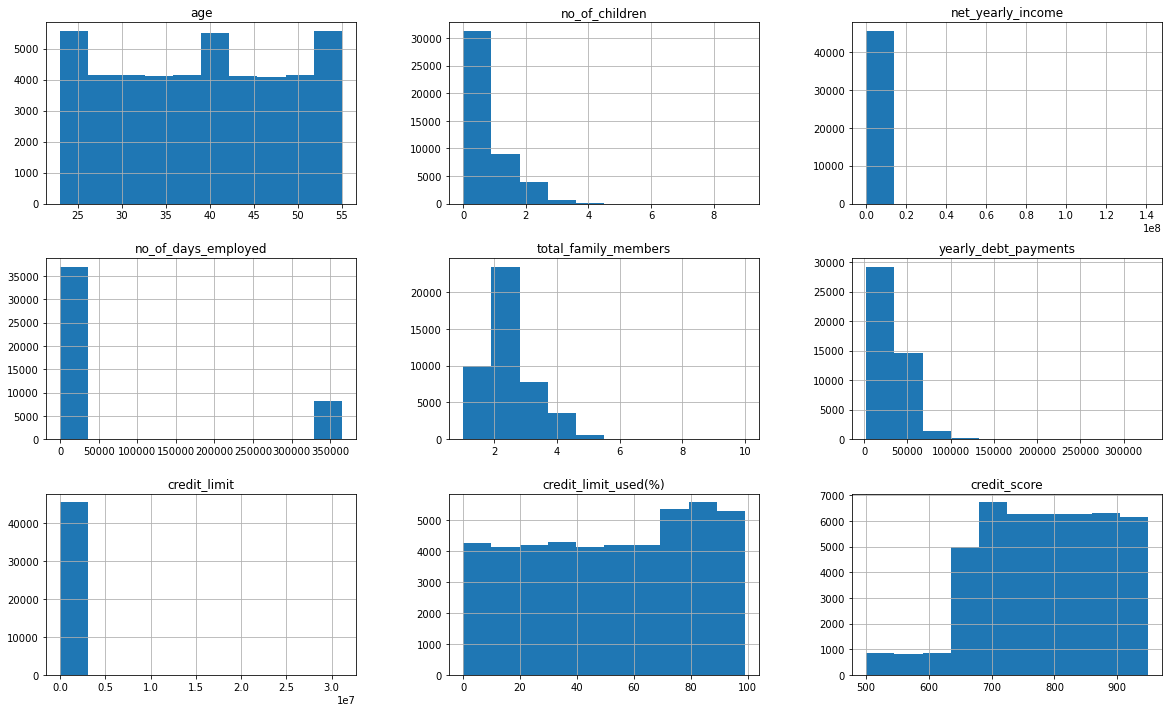

In [25]:

df_train_inV=df_train.drop('credit_card_default',axis=1).hist(figsize=(20,12))
plt.show()

**Insight : we can see  some plots are following normal distribution like total family numbers , yearly debt payments**

**Numerical Data**

In [26]:
df_hist=df_train.drop('credit_card_default',axis=1).select_dtypes(np.number)
df_hist

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score
0,46,0.0,107934.04,612.0,1.0,33070.28,18690.93,73,544.0
1,29,0.0,109862.62,2771.0,2.0,15329.53,37745.19,52,857.0
2,37,0.0,230153.17,204.0,2.0,48416.60,41598.36,43,650.0
3,39,0.0,122325.82,11941.0,2.0,22574.36,32627.76,20,754.0
4,46,0.0,387286.00,1459.0,1.0,38282.95,52950.64,75,927.0
...,...,...,...,...,...,...,...,...,...
45523,55,2.0,96207.57,117.0,4.0,11229.54,29663.83,82,907.0
45524,31,0.0,383476.74,966.0,2.0,43369.91,139947.16,32,679.0
45525,27,0.0,260052.18,1420.0,2.0,22707.51,83961.83,46,727.0
45526,32,0.0,157363.04,2457.0,2.0,20150.10,25538.72,92,805.0


**Checking Skewness of Data**

In [27]:
df_train.drop('credit_card_default',axis=1).skew()

age                          0.003975
no_of_children               1.827606
net_yearly_income          203.683504
no_of_days_employed          1.667675
total_family_members         0.924824
migrant_worker               1.673767
yearly_debt_payments         1.721201
credit_limit               200.387167
credit_limit_used(%)        -0.127449
credit_score                -0.302517
prev_defaults                4.681004
default_in_last_6months      4.103720
dtype: float64

<AxesSubplot:>

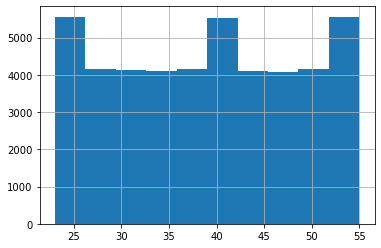

In [28]:
df_train['age'].hist()

In [29]:
df_train['credit_limit']

0         18690.93
1         37745.19
2         41598.36
3         32627.76
4         52950.64
           ...    
45523     29663.83
45524    139947.16
45525     83961.83
45526     25538.72
45527     36630.76
Name: credit_limit, Length: 45528, dtype: float64

<AxesSubplot:xlabel='occupation_type', ylabel='count'>

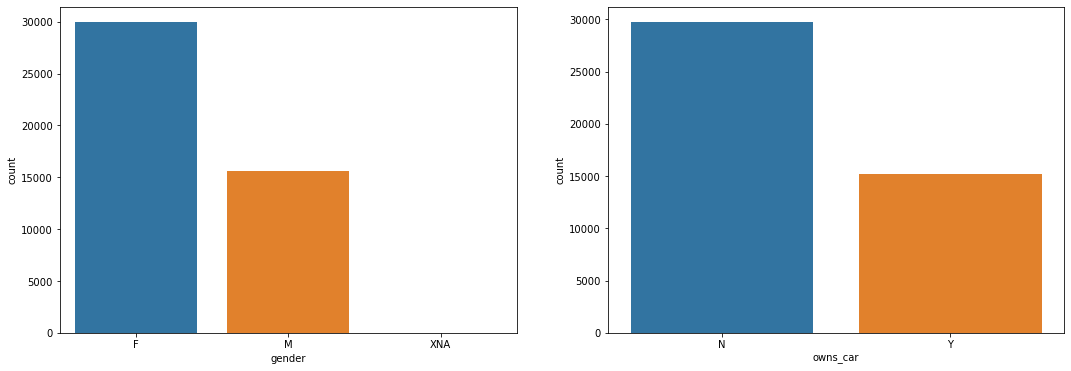

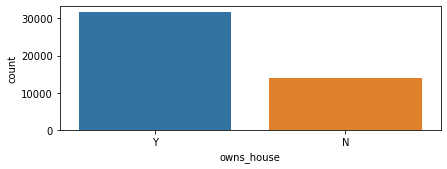

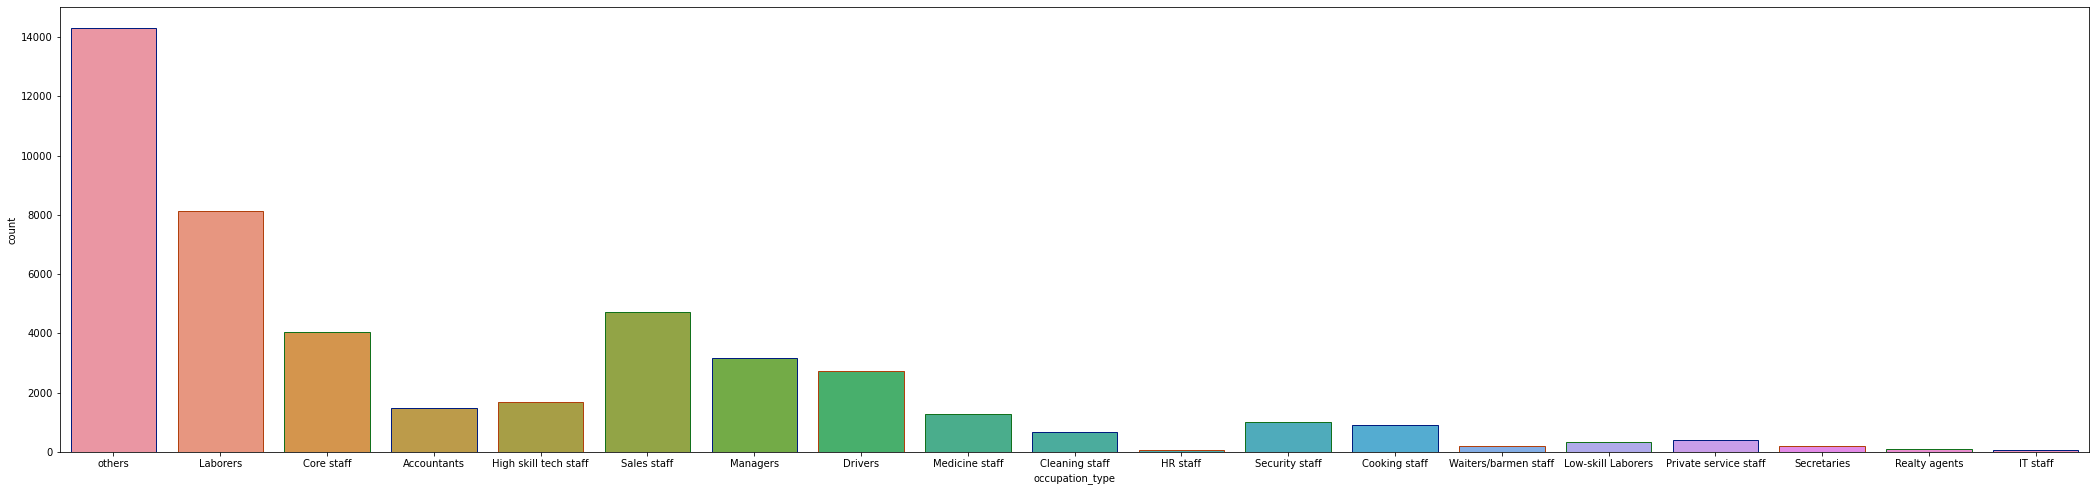

In [30]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(df_train.gender)
plt.subplot(1,2,2)
sns.countplot(df_train.owns_car)
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.countplot(df_train.owns_house)
plt.figure(figsize=(80,18))
plt.subplot(2,2,2)
sns.countplot(df_train.occupation_type,orient="V", edgecolor=sns.color_palette("dark", 3))

In [31]:
df_train.occupation_type.value_counts()

others                   14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

**Insight: we can observe from bar graph there are more female, less people owning car and more people owning house, and more laborers as occupation**

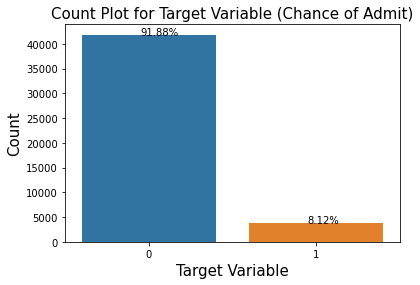

In [32]:
df_target = df_train['credit_card_default'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()


sns.countplot(x = df_target)


plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')


plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

In [33]:
df_na=pd.DataFrame({"NA_Count":df_train.isnull().sum(),"NA_Percentage":round(df_train.isnull().sum()/len(df_train),4)*100})
df_na

,NA_Count,NA_Percentage
age,0,0.00
gender,0,0.00
owns_car,547,1.20
owns_house,0,0.00
no_of_children,774,1.70
net_yearly_income,0,0.00
no_of_days_employed,463,1.02
occupation_type,0,0.00
total_family_members,83,0.18
migrant_worker,87,0.19


In [34]:
df_train.corr()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score
age,1.000000,-0.009082,0.004079,0.000506,-0.010640,-0.002453,0.004473,-0.005529,0.000817
no_of_children,-0.009082,1.000000,0.008939,-0.243088,0.880278,0.028706,0.009354,0.007487,-0.014673
net_yearly_income,0.004079,0.008939,1.000000,-0.029367,0.010432,0.076958,0.993378,0.002696,-0.009688
no_of_days_employed,0.000506,-0.243088,-0.029367,1.000000,-0.229344,-0.104545,-0.027745,-0.018720,0.035533
total_family_members,-0.010640,0.880278,0.010432,-0.229344,1.000000,0.078669,0.010251,0.001928,-0.011524
yearly_debt_payments,-0.002453,0.028706,0.076958,-0.104545,0.078669,1.000000,0.075169,-0.006850,0.005756
credit_limit,0.004473,0.009354,0.993378,-0.027745,0.010251,0.075169,1.000000,0.003109,-0.009685
credit_limit_used(%),-0.005529,0.007487,0.002696,-0.018720,0.001928,-0.006850,0.003109,1.000000,-0.174420
credit_score,0.000817,-0.014673,-0.009688,0.035533,-0.011524,0.005756,-0.009685,-0.174420,1.000000


<AxesSubplot:>

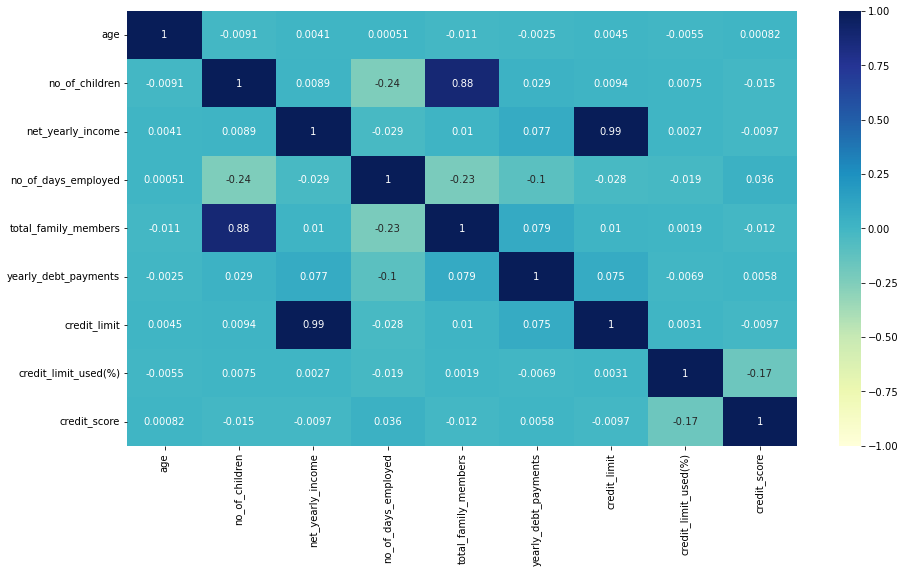

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True,vmax=1,vmin=-1,cmap="YlGnBu")

**Insight:**
**We can some of variables are having very high correlation of around approx 0.9 :
 Total Family Members and NO of Children, Net Yearly Income and Credit Limit, We can drop few columns to avoid Multicollinearity
,others variables are having less correlation**

**Checking Numerical and Categorical Data**

In [36]:
ds=df_train
numerical = [i for i in ds.columns if ds[i].dtypes != 'object']
numerical_ds = ds[numerical]
categorical = [i for i in ds.columns if i not in numerical]
categorical_ds = ds[categorical]
numerical_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   45528 non-null  int64  
 1   no_of_children        44754 non-null  float64
 2   net_yearly_income     45528 non-null  float64
 3   no_of_days_employed   45065 non-null  float64
 4   total_family_members  45445 non-null  float64
 5   yearly_debt_payments  45433 non-null  float64
 6   credit_limit          45528 non-null  float64
 7   credit_limit_used(%)  45528 non-null  int64  
 8   credit_score          45520 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.1 MB


**Checking Outliers**

**1.Visualizing through matplotlib boxplot using plt.boxplot().**

**2.Using 1.5 IQR rule.**

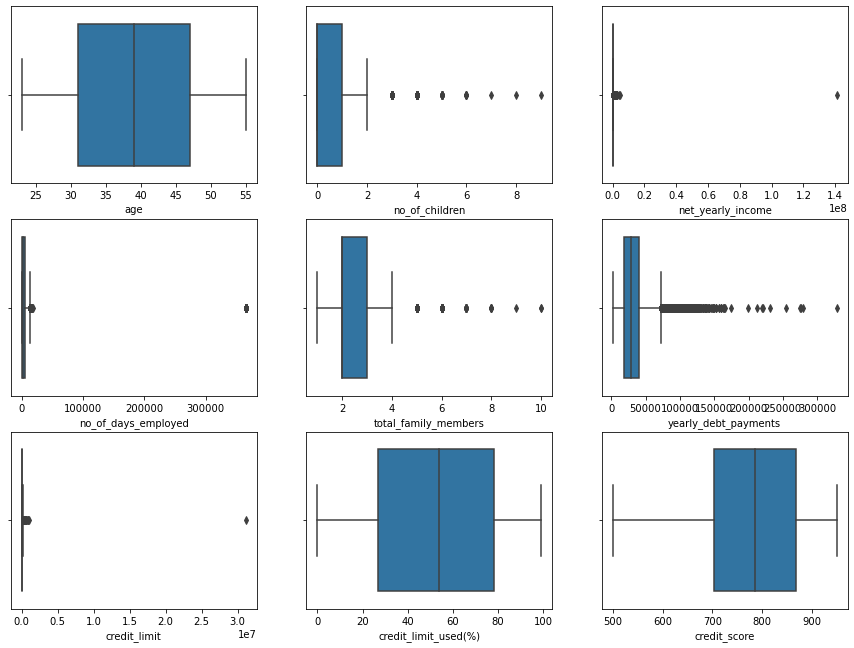

In [37]:
plt.figure(figsize=(15,15))
for i in enumerate(numerical_ds.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(numerical_ds[i[1]])
    plt.xlabel(i[1])
    

{'whiskers': [<matplotlib.lines.Line2D at 0x1b653ea89a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b653eb4100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b653ea8670>],
 'medians': [<matplotlib.lines.Line2D at 0x1b653eb47c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b653eb4b50>],
 'means': []}

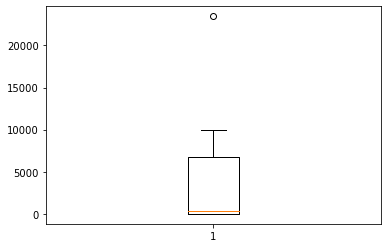

In [38]:
plt.boxplot(numerical_ds['total_family_members'].value_counts())

In [39]:
numerical_ds.columns

Index(['age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'yearly_debt_payments', 'credit_limit',
       'credit_limit_used(%)', 'credit_score'],
      dtype='object')

1.0 2.5 -1.5


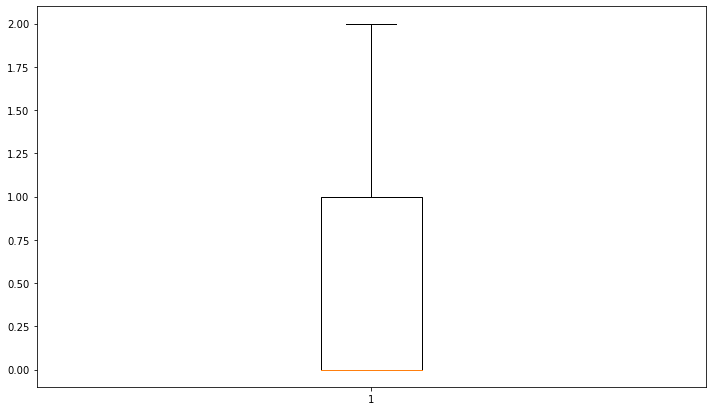

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45523    2.0
45524    0.0
45525    0.0
45526    0.0
45527    1.0
Name: no_of_children, Length: 44088, dtype: float64

In [40]:
arr1=numerical_ds['no_of_children'] 
# finding the 1st quartile
q1 = arr1.quantile(0.25)
 
# finding the 3rd quartile
q3 = arr1.quantile(0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
arr2 = arr1[(arr1 > lower_bound) & (arr1 < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()
numerical_ds['no_of_children']=arr2
arr2

114257.925 411990.6475 -45041.052500000005


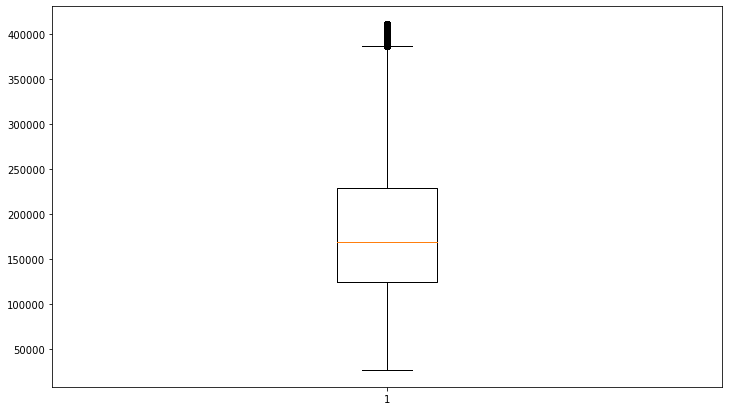

In [41]:
arr1=numerical_ds['net_yearly_income'] 
# finding the 1st quartile
q1 = arr1.quantile(0.25)
 
# finding the 3rd quartile
q3 = arr1.quantile(0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
arr2 = arr1[(arr1 > lower_bound) & (arr1 < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()
numerical_ds['net_yearly_income']=arr2


4881.0 13138.5 -6385.5


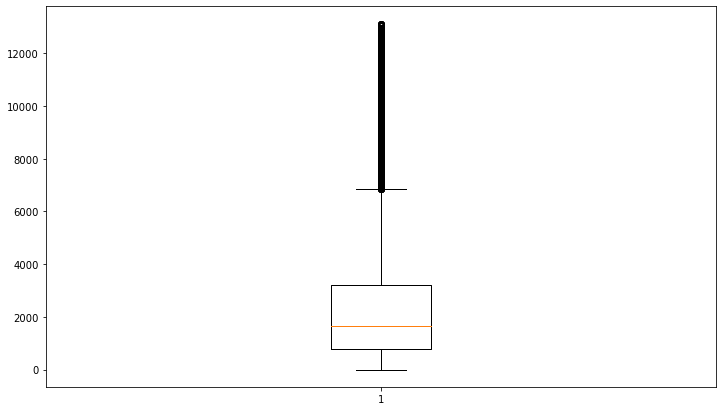

In [42]:
arr1=numerical_ds['no_of_days_employed'] 
# finding the 1st quartile
q1 = arr1.quantile(0.25)
 
# finding the 3rd quartile
q3 = arr1.quantile(0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
arr2 = arr1[(arr1 > lower_bound) & (arr1 < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()
numerical_ds['no_of_days_employed']=arr2


1.0 4.5 0.5


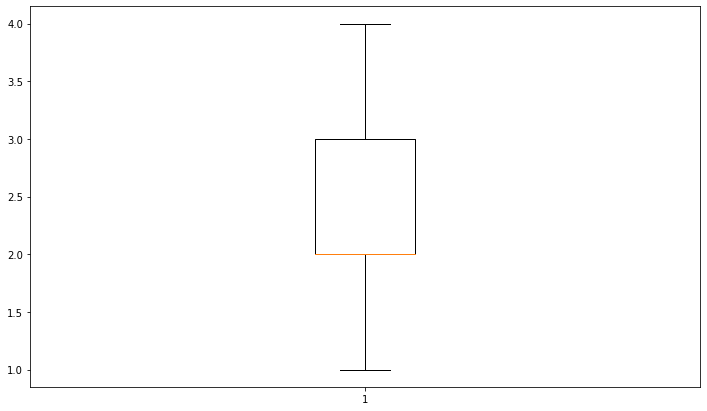

In [43]:
arr1=numerical_ds['total_family_members'] 
# finding the 1st quartile
q1 = arr1.quantile(0.25)
 
# finding the 3rd quartile
q3 = arr1.quantile(0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
arr2 = arr1[(arr1 > lower_bound) & (arr1 < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()
numerical_ds['total_family_members']=arr2


21330.010000000002 72556.16500000001 -12763.875000000004


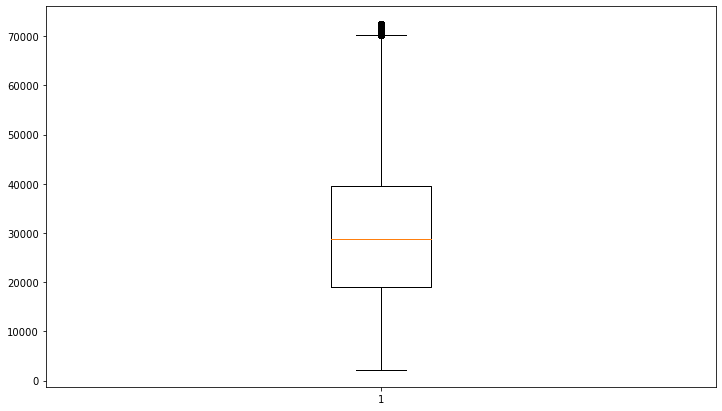

In [44]:
arr1=numerical_ds['yearly_debt_payments'] 
# finding the 1st quartile
q1 = arr1.quantile(0.25)
 
# finding the 3rd quartile
q3 = arr1.quantile(0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
arr2 = arr1[(arr1 > lower_bound) & (arr1 < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()
numerical_ds['yearly_debt_payments']=arr2


29461.957499999997 97628.69875 -20219.13125


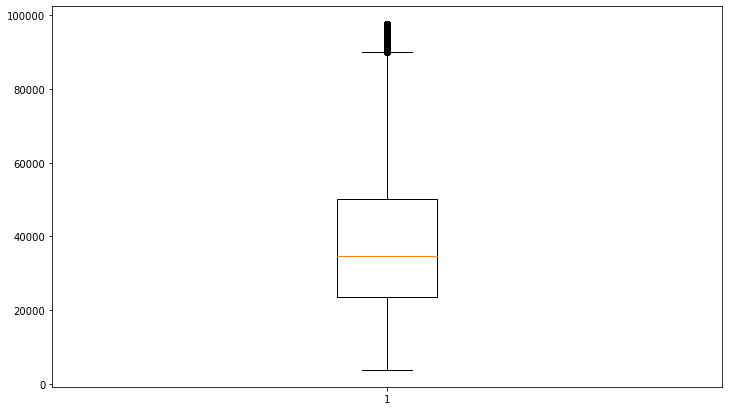

In [45]:
arr1=numerical_ds['credit_limit'] 
# finding the 1st quartile
q1 = arr1.quantile(0.25)
 
# finding the 3rd quartile
q3 = arr1.quantile(0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)
arr2 = arr1[(arr1 > lower_bound) & (arr1 < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()
numerical_ds['credit_limit']=arr2


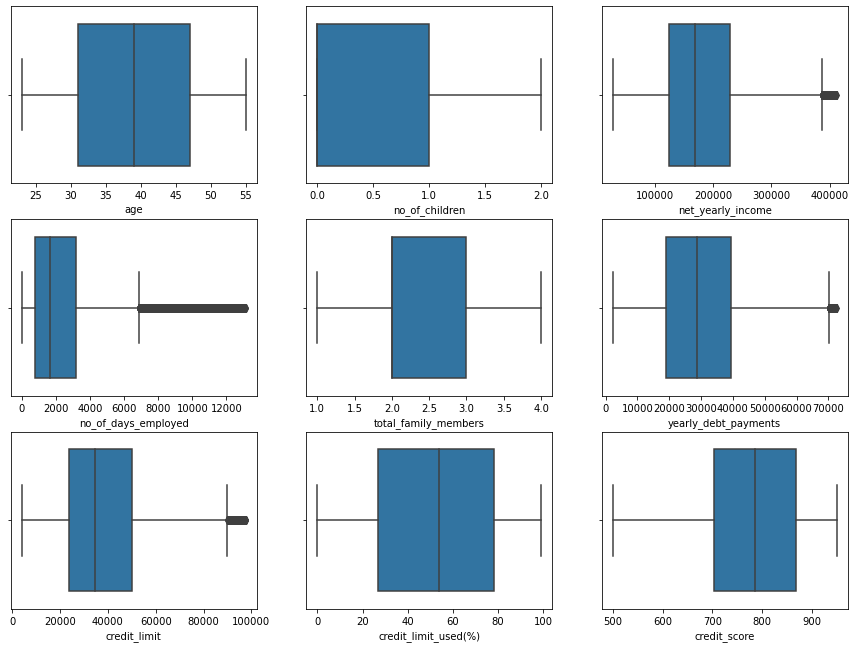

In [46]:
plt.figure(figsize=(15,15))
for i in enumerate(numerical_ds.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(numerical_ds[i[1]])
    plt.xlabel(i[1])

**Insight: We can observe outliers in variables : yearly debt payment, credit limit,No of Children,Total Family Members,Credit Limit**

<AxesSubplot:title={'center':'likes boxplot'}, xlabel='prev_defaults'>

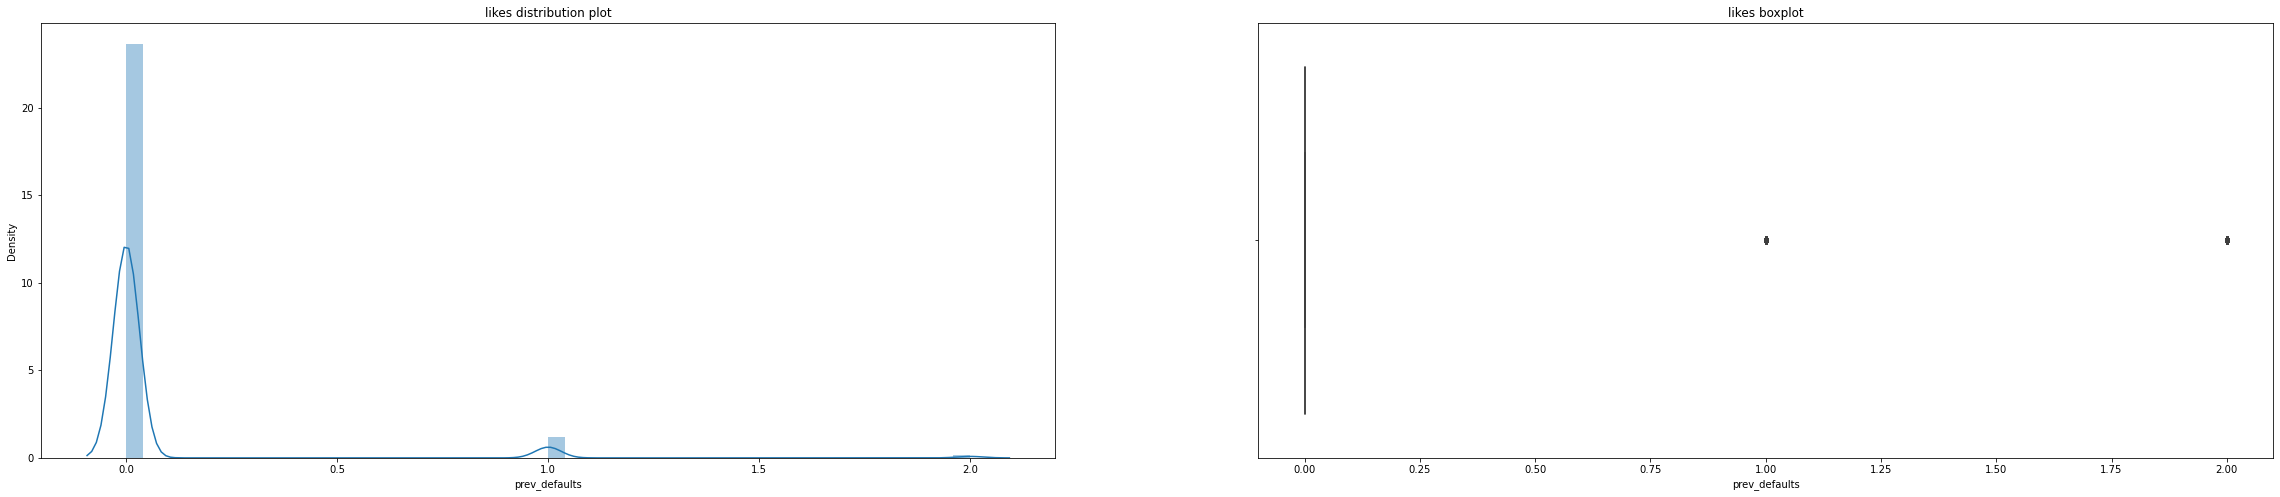

In [47]:
plt.figure(figsize=(40,8))
plt.subplot(1,2,1)
plt.title('likes distribution plot')
sns.distplot(df_train.prev_defaults)
plt.subplot(1,2,2)
plt.title('likes boxplot')
sns.boxplot(df_train.prev_defaults)

<AxesSubplot:title={'center':'likes distribution plot'}, xlabel='prev_defaults', ylabel='Density'>

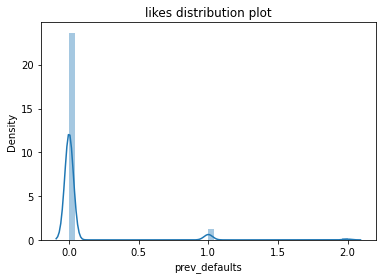

In [48]:
plt.title('likes distribution plot')
sns.distplot(df_train.prev_defaults)

In [49]:
df_num = df_train.select_dtypes(include = np.number )

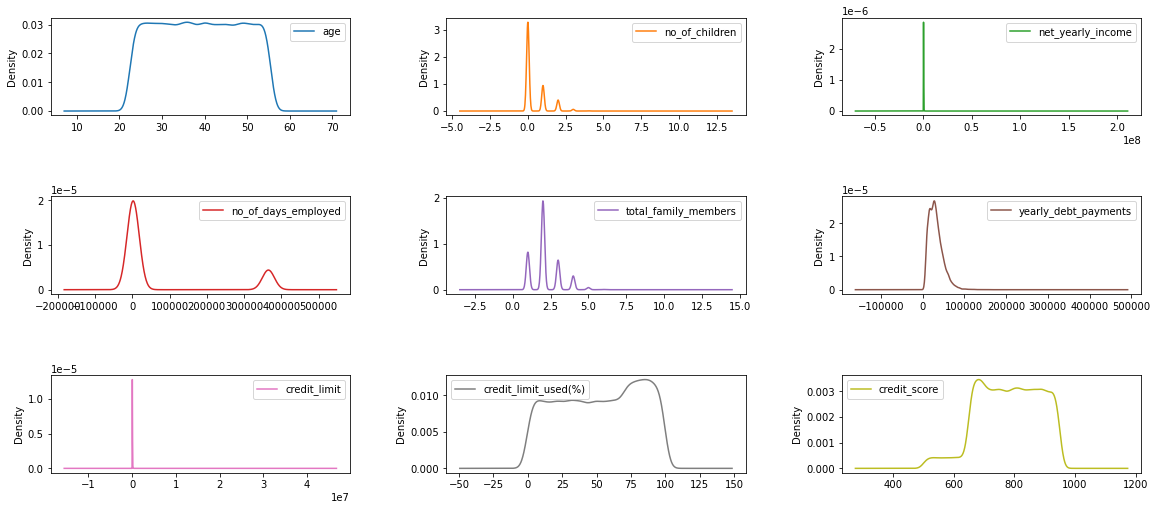

In [50]:
plt.rcParams["figure.figsize"] = [17,8]
df_num.plot(kind = 'kde', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout(pad = 4)
plt.show()

**Insight: We can observe no of days employed are normally distributed having bimodal distribution, yearlydebt payment right skewed,
no of children and family members with more than one modes, credit score, scret limit and age are platikurti and credit limit and net nearly income lepokurtic**

**BIVARIATE ANALYSIS**

<AxesSubplot:xlabel='credit_card_default', ylabel='migrant_worker'>

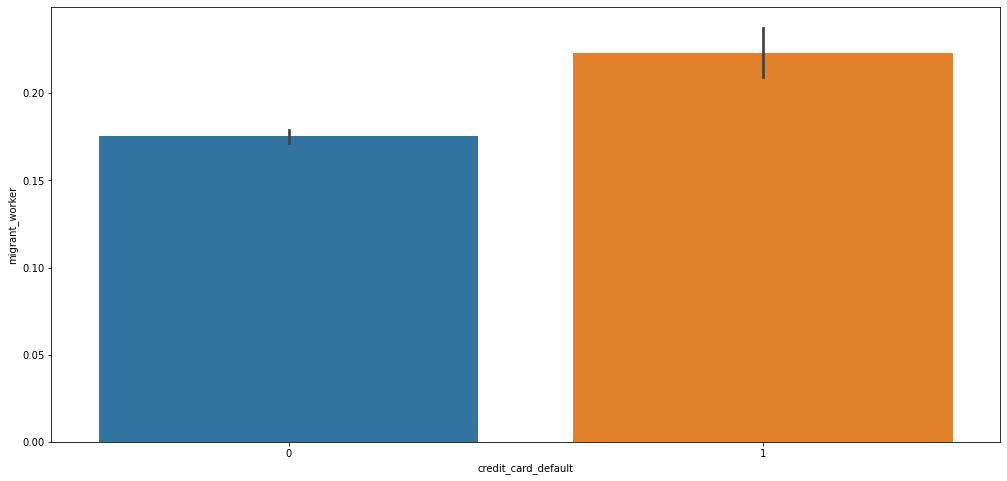

In [51]:
sns.barplot(x='credit_card_default',y='migrant_worker',data=df_train)

**Insight: In case of migrant workers we have more deafulters than non defaulters**

In [52]:
df_train['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

In [53]:
df_train['migrant_worker'].value_counts()

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

<AxesSubplot:xlabel='migrant_worker', ylabel='credit_card_default'>

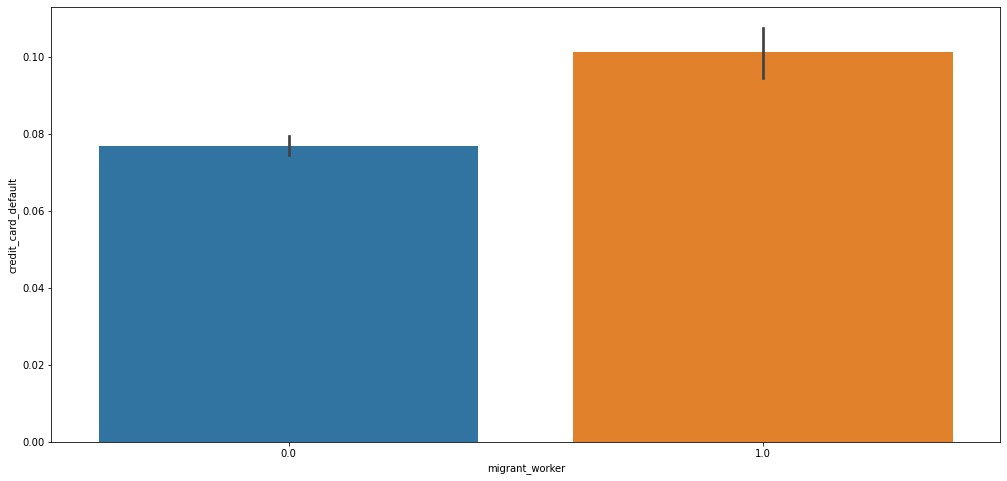

In [54]:
sns.barplot(x='migrant_worker',y='credit_card_default',data=df_train)

<AxesSubplot:xlabel='total_family_members', ylabel='credit_card_default'>

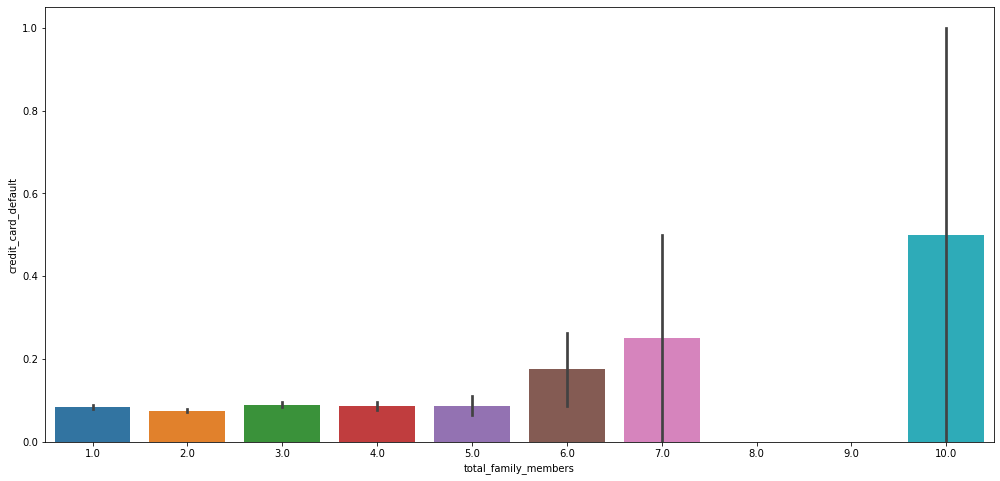

In [55]:
sns.barplot(x='total_family_members',y='credit_card_default',data=df_train)

**Insight: People with more number of faamily(>=6) members are more in deafulters numbers**

In [56]:
df_train.columns

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

In [57]:
df_train.dtypes

age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker              object
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults               object
default_in_last_6months     object
credit_card_default         object
dtype: object

In [58]:
df_train['no_of_children'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [59]:
df_train['no_of_children']=df_train['no_of_children'].replace(np.nan,df_train['no_of_children'].mean())

In [60]:
df_train['no_of_children']=df_train['no_of_children'].astype(int)

In [61]:
df_train['no_of_children'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
df_train.dtypes

age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children               int32
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker              object
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults               object
default_in_last_6months     object
credit_card_default         object
dtype: object

In [63]:
df_train['owns_car'].value_counts()

N    29743
Y    15238
Name: owns_car, dtype: int64

In [64]:
df_train['migrant_worker'].value_counts()

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

# missing value treatment using mode,mean,median,dropna

In [65]:
df_train['owns_car']=df_train['owns_car'].replace(np.nan,df_train['owns_car'].mode()[0])

In [66]:
df_train['no_of_days_employed']=df_train['no_of_days_employed'].replace(np.nan,df_train['no_of_days_employed'].mean())

In [67]:
df_train['total_family_members']=df_train['total_family_members'].replace(np.nan,df_train['total_family_members'].median())

In [68]:
df_train['migrant_worker']=df_train['migrant_worker'].replace(np.nan,df_train['migrant_worker'].mode()[0])

In [69]:
df_train['yearly_debt_payments']=df_train['yearly_debt_payments'].replace(np.nan,df_train['yearly_debt_payments'].median())

In [70]:
df_train['credit_score'].isnull().sum()

8

In [71]:
df_train.dropna(subset=['credit_score'],inplace=True)

In [72]:
df_train['credit_score']=df_train['credit_score'].dropna()

In [73]:
df_train['credit_score']=df_train['credit_score'].dropna()


In [74]:
df_na=pd.DataFrame({"NA_Count":df_train.isnull().sum(),"NA_Percentage":round(df_train.isnull().sum()/len(df_train),4)*100})
df_na

,NA_Count,NA_Percentage
age,0,0.0
gender,0,0.0
owns_car,0,0.0
owns_house,0,0.0
no_of_children,0,0.0
net_yearly_income,0,0.0
no_of_days_employed,0,0.0
occupation_type,0,0.0
total_family_members,0,0.0
migrant_worker,0,0.0


In [75]:
df_train[df_train['gender']=='XNA']

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,52,XNA,N,Y,2,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [76]:
df_train['gender'].value_counts()


F      29952
M      15567
XNA        1
Name: gender, dtype: int64

In [77]:
df_train.isnull().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [78]:
df_num=df_train.select_dtypes(np.number)
df_num

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score
0,46,0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0
1,29,0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0
2,37,0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0
3,39,0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0
4,46,0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0
...,...,...,...,...,...,...,...,...,...,...
45523,55,2,96207.57,117.0,4.0,0.0,11229.54,29663.83,82,907.0
45524,31,0,383476.74,966.0,2.0,1.0,43369.91,139947.16,32,679.0
45525,27,0,260052.18,1420.0,2.0,0.0,22707.51,83961.83,46,727.0
45526,32,0,157363.04,2457.0,2.0,0.0,20150.10,25538.72,92,805.0


In [79]:
cat_col=df_train.select_dtypes(include='object')
cat_col

,gender,owns_car,owns_house,occupation_type,prev_defaults,default_in_last_6months,credit_card_default
0,F,N,Y,others,2,1,1
1,M,N,Y,Laborers,0,0,0
2,M,N,Y,Laborers,0,0,0
3,F,N,Y,Core staff,0,0,0
4,M,Y,Y,Core staff,0,0,0
...,...,...,...,...,...,...,...
45523,F,N,N,others,0,0,0
45524,F,N,Y,Accountants,0,0,0
45525,F,N,Y,Core staff,0,0,0
45526,M,Y,N,Laborers,0,0,0


In [80]:
df_num

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score
0,46,0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0
1,29,0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0
2,37,0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0
3,39,0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0
4,46,0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0
...,...,...,...,...,...,...,...,...,...,...
45523,55,2,96207.57,117.0,4.0,0.0,11229.54,29663.83,82,907.0
45524,31,0,383476.74,966.0,2.0,1.0,43369.91,139947.16,32,679.0
45525,27,0,260052.18,1420.0,2.0,0.0,22707.51,83961.83,46,727.0
45526,32,0,157363.04,2457.0,2.0,0.0,20150.10,25538.72,92,805.0


In [81]:
df_train

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0,107934.04,612.0,others,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,F,N,N,2,96207.57,117.0,others,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,31,F,N,Y,0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,27,F,N,Y,0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,32,M,Y,N,0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


# ANNOVA TEST 
Since credit score follow normal dist

Null Hypothesis (H0): The null hypothesis states that there is no significant difference in the means of the credit scores among different occupation groups. In other words, the occupation type has no effect on credit scores.

Alternative Hypothesis (H1): The alternative hypothesis states that there is a significant difference in the means of the credit scores among at least one pair of occupation groups. In other words, the occupation type does have an effect on credit scores.

In [132]:
import pandas as pd
from scipy.stats import f_oneway

# Load your dataset into a DataFrame
df = df_train  # Replace with the actual path to your dataset
#Null Hypothesis (H₀): There is no significant difference in credit scores among different occupation groups.

#Alternate Hypothesis (H₁): There is a significant difference in credit scores among different occupation groups.

# Assuming 'occupation_type' is the categorical variable and 'credit_score' is the continuous variable
# Perform ANOVA test
result = df.groupby('occupation_type')['credit_score'].apply(list)

f_statistic, p_value = f_oneway(*result)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in credit scores among occupation groups, the occupation type does have an effect on credit scores.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in credit scores among occupation groups.")


F-statistic: 7.5321534190206165
P-value: 4.90842868742392e-20
Reject null hypothesis: There is a significant difference in credit scores among occupation groups, the occupation type does have an effect on credit scores.


In [83]:
#conclusion
#the occupation an individual belongs to appears to have a meaningful impact on their credit score.
#credit scores of individuals in the dataset   based on their occupation types.

In [84]:
df_train[['gender','credit_card_default']]


,gender,credit_card_default
0,F,1
1,M,0
2,M,0
3,F,0
4,M,0
...,...,...
45523,F,0
45524,F,0
45525,F,0
45526,M,0


In [85]:
import pandas as pd
import scipy.stats as stats

# Create a DataFrame with your data


df = df_train

# Assuming 'gender' is the binary categorical variable and 'credit_card_default' is binary as well
group_female = df[df['gender'] == 'F']['credit_card_default']
group_male = df[df['gender'] == 'M']['credit_card_default']

# Perform proportion test (z-test for proportions)
p1 = group_female.mean()  # Proportion of credit card defaulters among females
p2 = group_male.mean()  # Proportion of credit card defaulters among males

n1 = len(group_female)
n2 = len(group_male)

z = (p1 - p2) / ((p1*(1-p1)/n1) + (p2*(1-p2)/n2))**0.5

p_value = 1 - stats.norm.cdf(z)

print("Z-score:", z)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in proportions of credit card defaulters between genders.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in proportions of credit card defaulters between genders.")


Z-score: -11.658619132172465
P-value: 1.0
Fail to reject null hypothesis: There is no significant difference in proportions of credit card defaulters between genders.


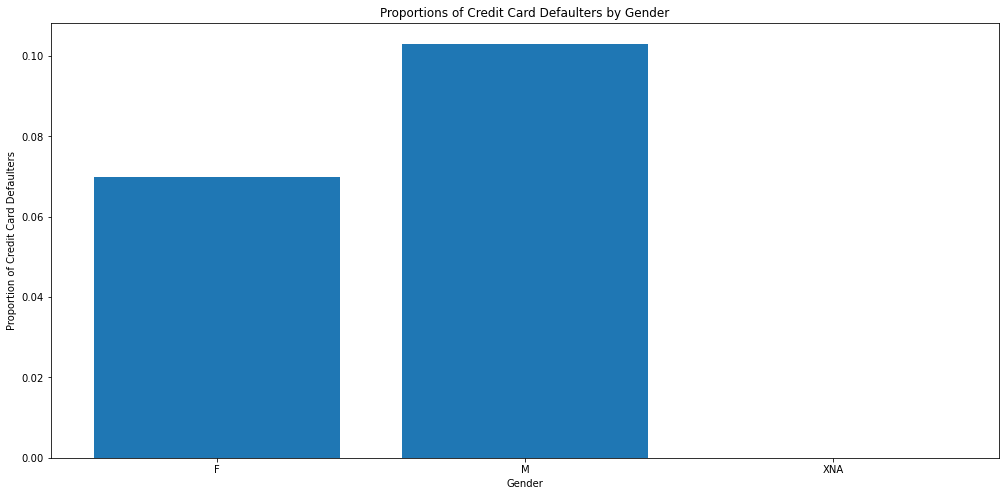

In [86]:
proportions = df.groupby('gender')['credit_card_default'].mean()

# Create a bar plot
plt.bar(proportions.index, proportions)
plt.xlabel('Gender')
plt.ylabel('Proportion of Credit Card Defaulters')
plt.title('Proportions of Credit Card Defaulters by Gender')
plt.show()
#Replace the placeholders with your actual data. This code will create a bar plot that shows the proportions of credit card defaulters for each gender. The height of the bars will represent the proportions, allowing you to visually compare them.







In [134]:
import pandas as pd
from scipy.stats import chi2_contingency
#Null Hypothesis (H₀): There is no significant association between gender and credit card defaulters.

#Alternate Hypothesis (H₁): There is a significant association between gender and credit card defaulters.


# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['credit_card_default'])
# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square:", chi2)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between gender and credit card defaulters.")
else:
    print("Fail to reject null hypothesis: There is no significant association between gender and credit card defaulters.")


Chi-Square: 151.3707436331874
P-value: 1.3497727598026457e-33
Reject null hypothesis: There is a significant association between gender and credit card defaulters.


In [88]:
cat_col=df_train.select_dtypes(include='object')
cat_col

,gender,owns_car,owns_house,occupation_type,prev_defaults,default_in_last_6months,credit_card_default
0,F,N,Y,others,2,1,1
1,M,N,Y,Laborers,0,0,0
2,M,N,Y,Laborers,0,0,0
3,F,N,Y,Core staff,0,0,0
4,M,Y,Y,Core staff,0,0,0
...,...,...,...,...,...,...,...
45523,F,N,N,others,0,0,0
45524,F,N,Y,Accountants,0,0,0
45525,F,N,Y,Core staff,0,0,0
45526,M,Y,N,Laborers,0,0,0


In [89]:
#statistical test


In [90]:
cat_col=pd.get_dummies(cat_col,drop_first=True)
cat_col

,gender_M,gender_XNA,owns_car_Y,owns_house_Y,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,...,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,prev_defaults_1,prev_defaults_2,default_in_last_6months_1,credit_card_default_1
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45524,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45525,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45526,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X=pd.concat([df_num,cat_col],1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45520 entries, 0 to 45527
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    45520 non-null  int64  
 1   no_of_children                         45520 non-null  int32  
 2   net_yearly_income                      45520 non-null  float64
 3   no_of_days_employed                    45520 non-null  float64
 4   total_family_members                   45520 non-null  float64
 5   migrant_worker                         45520 non-null  float64
 6   yearly_debt_payments                   45520 non-null  float64
 7   credit_limit                           45520 non-null  float64
 8   credit_limit_used(%)                   45520 non-null  int64  
 9   credit_score                           45520 non-null  float64
 10  gender_M                               45520 non-null  uint8  
 11  ge

In [92]:
y=X['credit_card_default_1']
y

0        1
1        0
2        0
3        0
4        0
        ..
45523    0
45524    0
45525    0
45526    0
45527    0
Name: credit_card_default_1, Length: 45520, dtype: uint8

In [93]:
x=X.drop(labels='credit_card_default_1',axis=1)
x

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,prev_defaults_1,prev_defaults_2,default_in_last_6months_1
0,46,0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,...,0,0,0,0,0,0,1,0,1,1
1,29,0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,...,0,0,0,0,0,0,0,0,0,0
2,37,0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,...,0,0,0,0,0,0,0,0,0,0
3,39,0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,...,0,0,0,0,0,0,0,0,0,0
4,46,0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,2,96207.57,117.0,4.0,0.0,11229.54,29663.83,82,907.0,...,0,0,0,0,0,0,1,0,0,0
45524,31,0,383476.74,966.0,2.0,1.0,43369.91,139947.16,32,679.0,...,0,0,0,0,0,0,0,0,0,0
45525,27,0,260052.18,1420.0,2.0,0.0,22707.51,83961.83,46,727.0,...,0,0,0,0,0,0,0,0,0,0
45526,32,0,157363.04,2457.0,2.0,0.0,20150.10,25538.72,92,805.0,...,0,0,0,0,0,0,0,0,0,0


# smote 


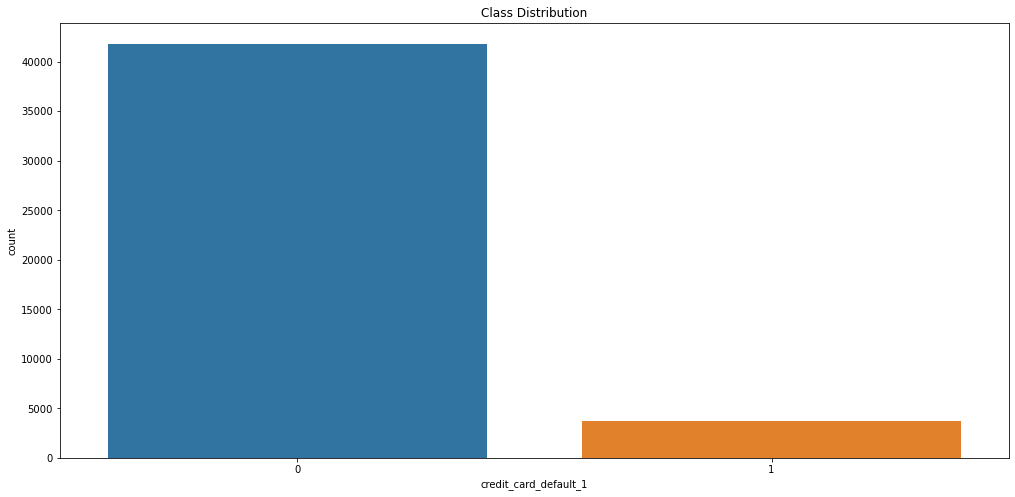

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming y contains your target labels
class_counts = Counter(y)
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


Inference : Majority of them were Non-Defaulters.



In [95]:
X['credit_card_default_1'].value_counts()

0    41824
1     3696
Name: credit_card_default_1, dtype: int64

# Oversampling using SMOTE


In [96]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install --upgrade imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [99]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your DataFrame is named 'data'
features = X.drop("credit_card_default_1", axis=1)  # Exclude the target column
labels = X["credit_card_default_1"]  # Target column

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features, labels)

# Create a new DataFrame with the resampled data
resampled_data = pd.concat([features_resampled, labels_resampled], axis=1)
resampled_data

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,prev_defaults_1,prev_defaults_2,default_in_last_6months_1,credit_card_default_1
0,46,0,107934.040000,612.000000,1.000000,1.000000,33070.280000,18690.930000,73,544.000000,...,0,0,0,0,0,1,0,1,1,1
1,29,0,109862.620000,2771.000000,2.000000,0.000000,15329.530000,37745.190000,52,857.000000,...,0,0,0,0,0,0,0,0,0,0
2,37,0,230153.170000,204.000000,2.000000,0.000000,48416.600000,41598.360000,43,650.000000,...,0,0,0,0,0,0,0,0,0,0
3,39,0,122325.820000,11941.000000,2.000000,0.000000,22574.360000,32627.760000,20,754.000000,...,0,0,0,0,0,0,0,0,0,0
4,46,0,387286.000000,1459.000000,1.000000,0.000000,38282.950000,52950.640000,75,927.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83643,54,0,190372.030833,1343.955695,1.003438,0.003438,30799.896112,49303.713343,80,560.271582,...,0,0,0,0,0,0,1,0,1,1
83644,41,0,108793.865032,669.922770,2.000000,0.000000,39637.668073,30304.451354,83,659.347022,...,0,0,0,0,0,0,0,0,0,1
83645,37,0,94508.194415,1390.704514,2.000000,0.000000,26511.478625,19595.803829,76,556.759577,...,0,0,0,0,0,0,0,0,0,1
83646,45,0,70208.965872,470.793723,1.492427,0.000000,6903.428515,10506.566623,85,617.287763,...,0,0,0,0,0,0,1,0,1,1


In [100]:
y=resampled_data['credit_card_default_1']
x=resampled_data.drop(labels='credit_card_default_1',axis=1)
x

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,prev_defaults_1,prev_defaults_2,default_in_last_6months_1
0,46,0,107934.040000,612.000000,1.000000,1.000000,33070.280000,18690.930000,73,544.000000,...,0,0,0,0,0,0,1,0,1,1
1,29,0,109862.620000,2771.000000,2.000000,0.000000,15329.530000,37745.190000,52,857.000000,...,0,0,0,0,0,0,0,0,0,0
2,37,0,230153.170000,204.000000,2.000000,0.000000,48416.600000,41598.360000,43,650.000000,...,0,0,0,0,0,0,0,0,0,0
3,39,0,122325.820000,11941.000000,2.000000,0.000000,22574.360000,32627.760000,20,754.000000,...,0,0,0,0,0,0,0,0,0,0
4,46,0,387286.000000,1459.000000,1.000000,0.000000,38282.950000,52950.640000,75,927.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83643,54,0,190372.030833,1343.955695,1.003438,0.003438,30799.896112,49303.713343,80,560.271582,...,0,0,0,0,0,0,0,1,0,1
83644,41,0,108793.865032,669.922770,2.000000,0.000000,39637.668073,30304.451354,83,659.347022,...,0,0,0,0,0,0,0,0,0,0
83645,37,0,94508.194415,1390.704514,2.000000,0.000000,26511.478625,19595.803829,76,556.759577,...,0,0,0,0,0,0,0,0,0,0
83646,45,0,70208.965872,470.793723,1.492427,0.000000,6903.428515,10506.566623,85,617.287763,...,0,0,0,0,0,0,0,1,0,1


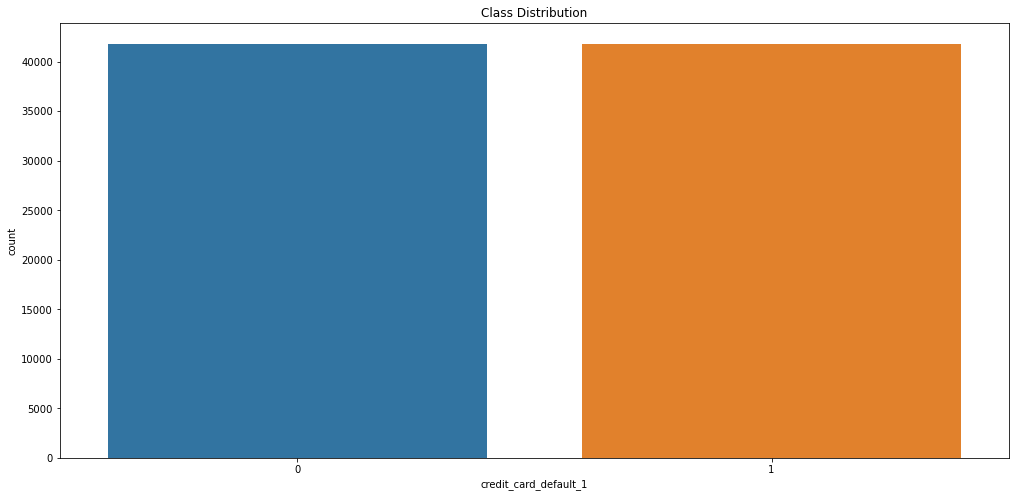

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming y contains your target labels
class_counts = Counter(y)
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [102]:
y.value_counts()

1    41824
0    41824
Name: credit_card_default_1, dtype: int64

Interpretation-dataset has indeed been successfully balanced using SMOTE and has the same number of instances for both classes,

**Splitting the test train Data and Model Training**

In [103]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(58553, 35)
(58553,)
(25095, 35)
(25095,)


**Scaling the data**

it's generally a good idea to perform feature scaling after splitting your data into training and testing sets. The reason for this is to prevent information leakage from the testing set into the training process and ensure that your model is truly evaluated on unseen data


you don't need to scale the target variable (y) when performing feature scaling on your input features (x). The target variable is usually not subjected to the same scaling as the input features because it's what you're trying to predict. Scaling the target variable could affect the interpretation of your model's predictions

By applying this process, you ensure that the scaling is done in a way that maintains the separation between training and testing data, preserving the integrity of your model evaluation.
##fit_transform
##sc.transform

In [104]:
sc=StandardScaler()
x_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_sc=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [105]:
x_train_sc.shape

(58553, 35)

**Logistic Regression: **

In [106]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [107]:
# Make predictions on the testing data
y_pred = logreg.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [136]:
log_likelihood_full_model = logreg.score(x_train, y_train)  # This calculates the accuracy, which is proportional to log-likelihood

# Initialize and train the intercept-only model
logreg_intercept_only = LogisticRegression(solver='lbfgs', fit_intercept=False)
logreg_intercept_only.fit(x_train, y_train)

# Get the log-likelihood of the intercept-only model
log_likelihood_intercept_only = logreg_intercept_only.score(x_train, y_train)  # This calculates the accuracy of the intercept-only model

# Calculate McFadden's R-squared
mcfadden_r2 = 1 - (log_likelihood_full_model / log_likelihood_intercept_only)

print("McFadden's R-squared:", mcfadden_r2)

McFadden's R-squared: -0.0002370835081064726


The value you obtained for McFadden's R-squared (-0.0002370835081064726) is very close to zero, which suggests that the model you evaluated doesn't explain the data significantly better than a null model (an intercept-only model). This is common in cases where the logistic regression model does not fit the data well or where the relationship between the predictors and the target variable is weak.

In [137]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels y_pred and true labels y_test
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)


F1 Score: 0.9871744121605573



The F1 score you obtained (0.9871744121605573) indicates that your model's performance is relatively good in terms of balancing precision and recall for the binary classification task. An F1 score of around 0.98 suggests that your model is making accurate predictions while maintaining a good balance between false positives and false negatives

In [110]:
from sklearn.metrics import confusion_matrix

# Assuming you have predicted labels y_pred and true labels y_test
conf_matrix = confusion_matrix(y_test, y_pred)

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

print("Confusion Matrix:")
for i in range(2):
    for j in range(2):
        print(f"{labels[i*2 + j]}: {conf_matrix[i, j]}")


Confusion Matrix:
True Negative: 11487
False Positive: 976
False Negative: 630
True Positive: 12002


In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
conf_matrix = [[12360, 217],
               [371, 708]]

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
[[12360, 217], [371, 708]]

Accuracy: 0.9360031878860331
Precision: 0.9247958082909539
Recall: 0.9501266624445852
F1-Score: 0.9372901210464661


# decision Tree  Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier 

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9832635983263598
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12463
           1       0.98      0.99      0.98     12632

    accuracy                           0.98     25095
   macro avg       0.98      0.98      0.98     25095
weighted avg       0.98      0.98      0.98     25095



In [ ]:
Accuraccy increases after using decision tree which tell that decision tree is a bettr model thn logestic regression

# random forest classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [115]:
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9877664873480773
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12463
           1       0.99      0.99      0.99     12632

    accuracy                           0.99     25095
   macro avg       0.99      0.99      0.99     25095
weighted avg       0.99      0.99      0.99     25095



# hyperparameter tuning with a Random Forest Classifier
# RandomizedSearchCV to select the best parameter for random forest 

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist,
    n_iter=10, scoring='accuracy', cv=3, random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Make predictions on the test data using the best model
y_pred = random_search.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42}
Accuracy: 0.987089061566049
